In [ ]:
# import os
# path = "/content/drive/MyDrive/AI Specialist Projects (Support)/Audio Data Project"
# os.chdir(path)

In [1]:
import os
WorkingDir = "D:\\TUANTA\\VTC Academiy\\AI VTCA Teaching Materials\\Short-Course AI\\4. AI Specialist(AI Engineer)"
WorkingDir += "\\2. Labs\\AI Specialist Support 03(Audio)"

os.chdir(WorkingDir)
checkPath = %pwd
print(checkPath)

D:\TUANTA\VTC Academiy\AI VTCA Teaching Materials\Short-Course AI\4. AI Specialist(AI Engineer)\2. Labs\AI Specialist Support 03(Audio)


In [ ]:
%pwd

'/content/drive/MyDrive/AI Specialist Projects (Support)/Audio Data Project'

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# import dependencies
from glob import glob
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np
from tqdm import tqdm
import cv2
import pandas as pd
seed = 7
import pandas as pd
np.random.seed(seed)
import os

In [23]:
os.listdir()

['Audio Conv2D.png',
 'Conv2D.png',
 'ESC-50-master',
 'ESC-50-master.zip',
 'Max Pooling.png',
 'Mel Spectrogram 01.png',
 'Mel Spectrogram 02.png',
 'Mel Spectrogram.png']

In [ ]:
# pip install patool
import patoolib
patoolib.extract_archive("ESC-50-master.zip")

In [ ]:
# from zipfile import ZipFile
# zf = ZipFile('ESC-50-master.zip', 'r')
# zf.extractall()
# zf.close()

In [5]:
from IPython.display import display, Image

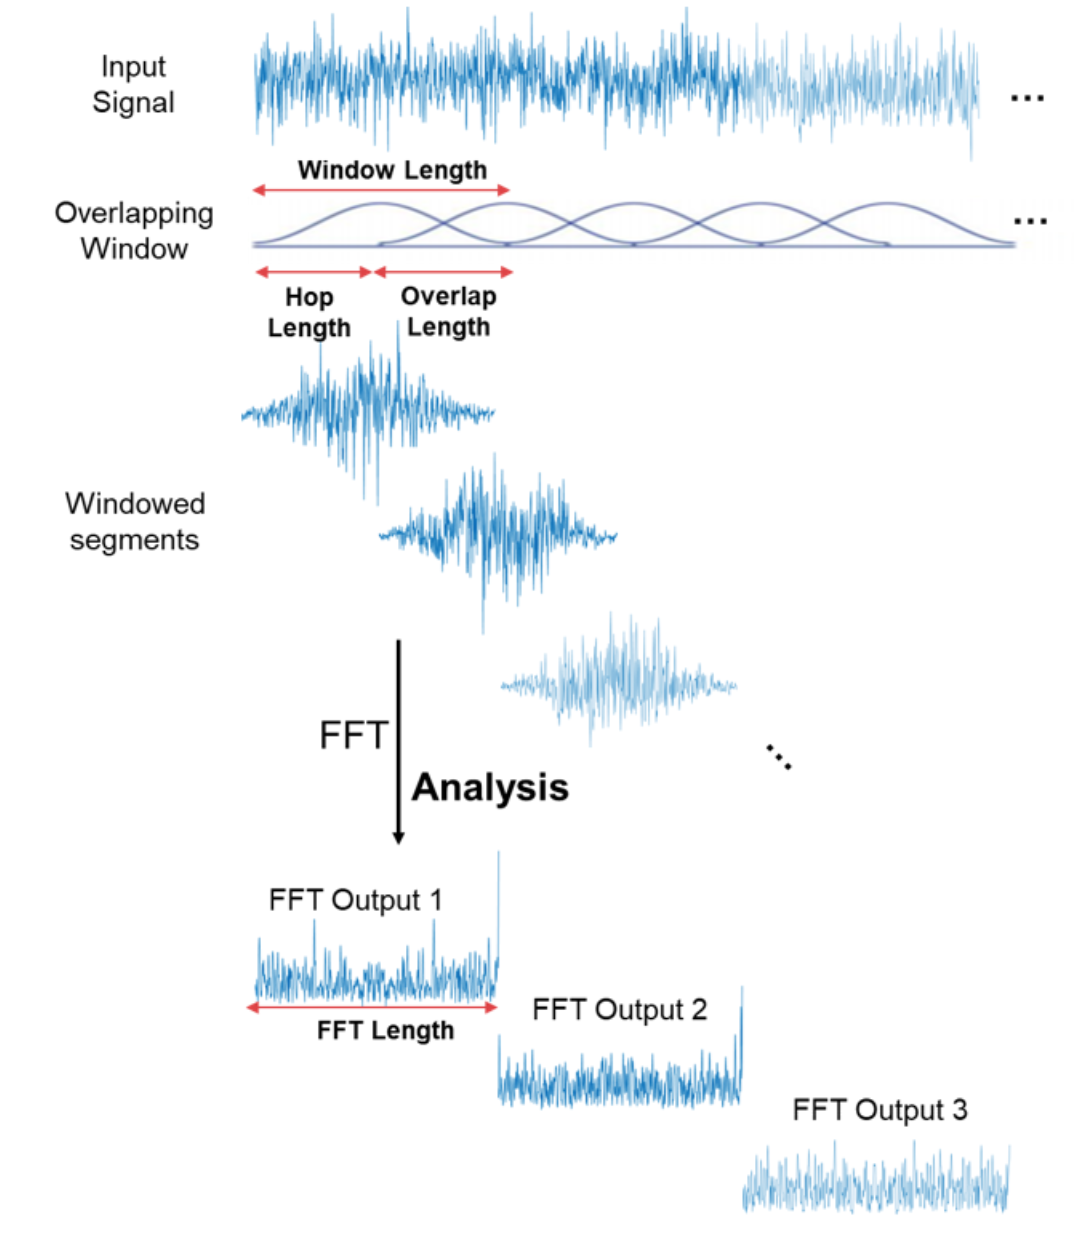

In [6]:
display(Image(filename='Mel Spectrogram.png'))

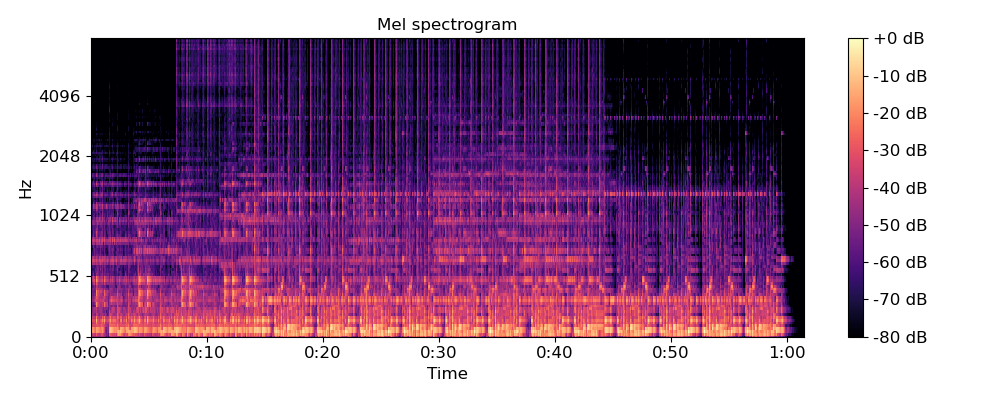

In [7]:
display(Image(filename='Mel Spectrogram 01.png'))

In [9]:
!pip install librosa

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23143 sha256=06ad8a1742b8ca33c60ee2fb3d3f8ced51f7d151bfcd51264fe6982b359a75c9
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\ba\7b\eb\213741ccc0678f63e346ab8dff10495995ca3f426af87b8d88
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320719 sha256=240eac2c509c8c9f273f8094df6b1e8c2d2f13f6ca5cede14d0a7570bc2a83cc
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\a0\18\0a\8ad18a597d8333a142c9789338a96a6208f1198d290ece356c
Successfully built audioread resampy


In [12]:
# !pip install librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [25]:
os.listdir()

['Audio Conv2D.png',
 'Conv2D.png',
 'ESC-50-master',
 'ESC-50-master.zip',
 'Max Pooling.png',
 'Mel Spectrogram 01.png',
 'Mel Spectrogram 02.png',
 'Mel Spectrogram.png']

In [28]:
FileList = glob('ESC-50-master/audio/*.wav')
display(FileList[:10])

['ESC-50-master/audio\\1-100032-A-0.wav',
 'ESC-50-master/audio\\1-100038-A-14.wav',
 'ESC-50-master/audio\\1-100210-A-36.wav',
 'ESC-50-master/audio\\1-100210-B-36.wav',
 'ESC-50-master/audio\\1-101296-A-19.wav',
 'ESC-50-master/audio\\1-101296-B-19.wav',
 'ESC-50-master/audio\\1-101336-A-30.wav',
 'ESC-50-master/audio\\1-101404-A-34.wav',
 'ESC-50-master/audio\\1-103298-A-9.wav',
 'ESC-50-master/audio\\1-103995-A-30.wav']

Load an audio file as a floating point time series.

Audio will be automatically resampled to the given rate (default sr=22050).

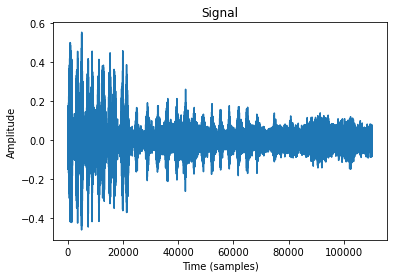

In [30]:
y, sr = librosa.load(FileList[1])
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [32]:
len(y)

110250

In [53]:
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
print(ft.shape)
ft

(1025, 1)


array([[0.00201037],
       [0.0031608 ],
       [0.00260987],
       ...,
       [0.07240405],
       [0.07238676],
       [0.07235219]], dtype=float32)

Short-time Fourier transform (STFT).
The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.

By Default, the Mel-scaled power spectrogram window and hop length are the following:
n_fft=2048
hop_length=512
So assuming you used the default sample rate (sr=22050):
output length = (seconds) * (sample rate) / (hop_length)
(1319) * (22050) / (512) = 56804 samples

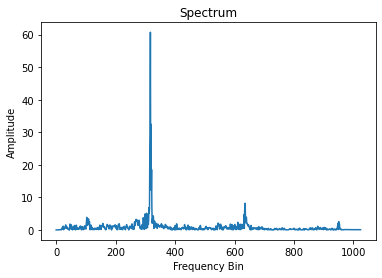

In [46]:
import numpy as np
n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

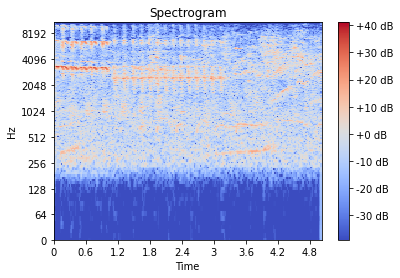

In [59]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec) # ref=np.max will make all db Output negative 
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

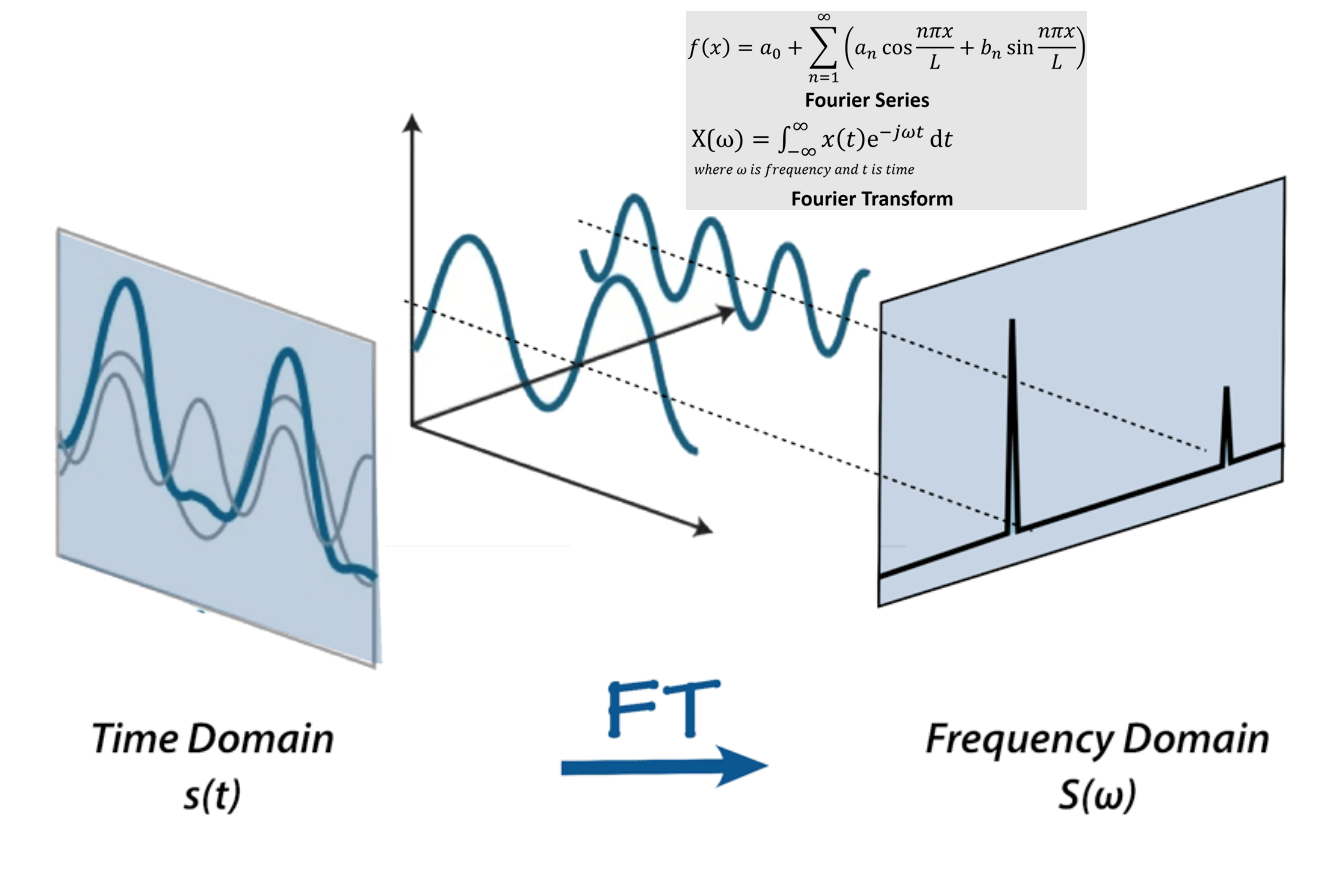

In [11]:
display(Image(filename='Mel Spectrogram 02.png'))

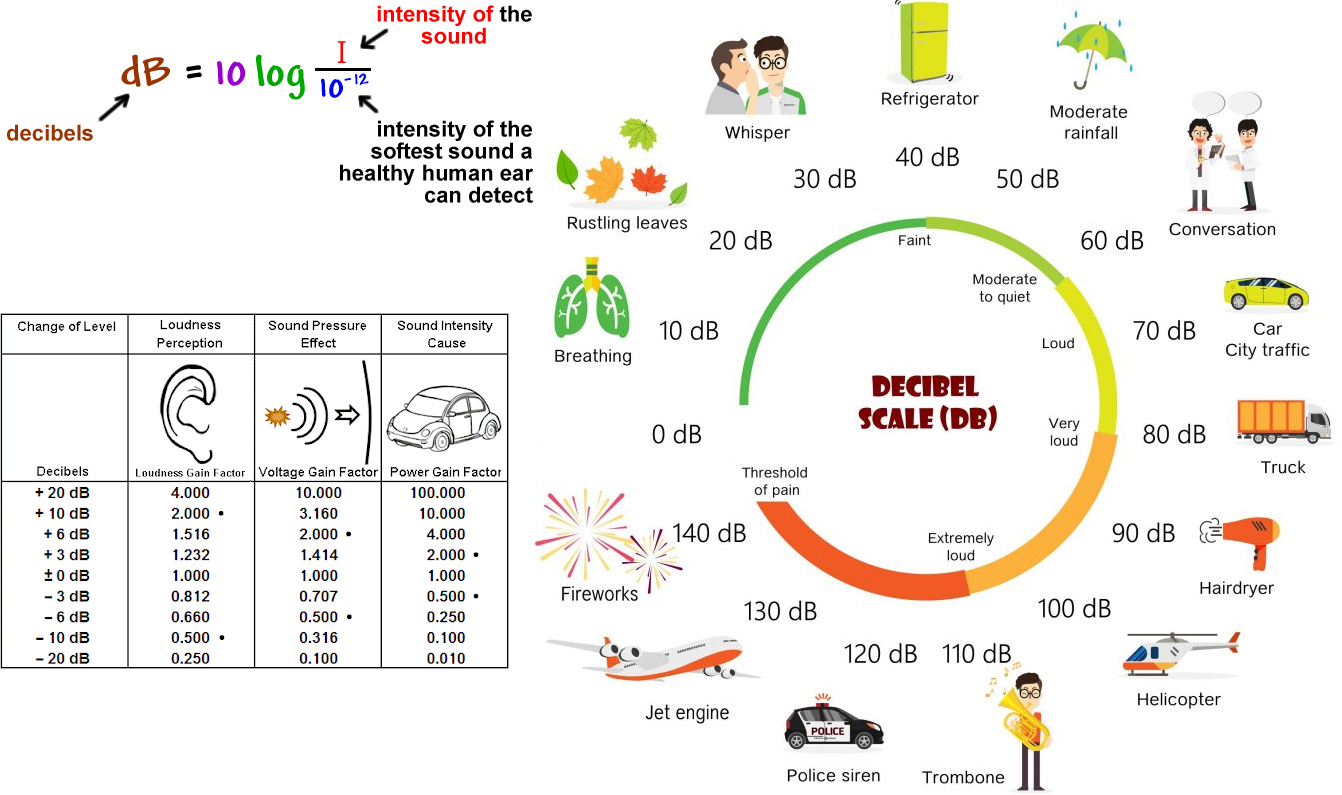

In [60]:
display(Image(filename='Mel Spectrogram 03.png'))

In [ ]:
def windows(data, window_size):
    start = 0
    while start < len(data):
        yield int(start), int(start + window_size)
        start += (window_size / 2)

In [ ]:
def extract_features(bands = 60, frames = 41):
    window_size = 512 * (frames - 1)
    log_specgrams = []
    labels = []
    for fn in tqdm(glob('ESC-50-master/audio/*')):
      sound_clip,s = librosa.load(fn) # 5sec
      sound_clip   = np.concatenate((sound_clip,sound_clip),axis=None) # make it 10s
      label = fn.split("/")[-1].split("-")[-1].split(".")[0]
      for (start,end) in windows(sound_clip,window_size):
          if(len(sound_clip[start:end]) == window_size):
              signal = sound_clip[start:end]
              melspec = librosa.feature.melspectrogram(signal, n_mels = bands)
              logspec = librosa.core.amplitude_to_db(melspec)
              logspec = logspec.T.flatten()[:, np.newaxis].T
              log_specgrams.append(logspec)
              labels.append(label)
            
    log_specgrams = np.asarray(log_specgrams).reshape(len(log_specgrams),bands,frames,1)
    features = np.concatenate((log_specgrams, np.zeros(np.shape(log_specgrams))), axis = 3)
    for i in range(len(features)):
        features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0])
    
    return np.array(features), np.array(labels,dtype = np.int)

In [ ]:
features,labels = extract_features()


100%|██████████| 2000/2000 [15:29<00:00,  2.15it/s]


In [ ]:
print(type(features))
print(features.shape)
print(type(labels))
print(labels.shape)

<class 'numpy.ndarray'>
(40000, 60, 41, 2)
<class 'numpy.ndarray'>
(40000,)


In [ ]:
# np.save('save_variable_features.npy', features)
# np.save('save_variable_labels.npy', labels)

In [ ]:
# feature_load = np.load('save_variable_features.npy')

In [ ]:
# label category names
df = pd.read_csv(glob('ESC-50-master/meta/esc50.csv')[0])
df = df[['target','category']]
df = df.drop_duplicates().reset_index(drop=True)
df = df.sort_values(by=['target']).reset_index(drop=True)
df.head()

,target,category
0,0,dog
1,1,rooster
2,2,pig
3,3,cow
4,4,frog


In [ ]:
my_dict = {}
for i in range(len(df)):
  my_dict[df['target'][i]] = df['category'][i]
my_dict

{0: 'dog',
 1: 'rooster',
 2: 'pig',
 3: 'cow',
 4: 'frog',
 5: 'cat',
 6: 'hen',
 7: 'insects',
 8: 'sheep',
 9: 'crow',
 10: 'rain',
 11: 'sea_waves',
 12: 'crackling_fire',
 13: 'crickets',
 14: 'chirping_birds',
 15: 'water_drops',
 16: 'wind',
 17: 'pouring_water',
 18: 'toilet_flush',
 19: 'thunderstorm',
 20: 'crying_baby',
 21: 'sneezing',
 22: 'clapping',
 23: 'breathing',
 24: 'coughing',
 25: 'footsteps',
 26: 'laughing',
 27: 'brushing_teeth',
 28: 'snoring',
 29: 'drinking_sipping',
 30: 'door_wood_knock',
 31: 'mouse_click',
 32: 'keyboard_typing',
 33: 'door_wood_creaks',
 34: 'can_opening',
 35: 'washing_machine',
 36: 'vacuum_cleaner',
 37: 'clock_alarm',
 38: 'clock_tick',
 39: 'glass_breaking',
 40: 'helicopter',
 41: 'chainsaw',
 42: 'siren',
 43: 'car_horn',
 44: 'engine',
 45: 'train',
 46: 'church_bells',
 47: 'airplane',
 48: 'fireworks',
 49: 'hand_saw'}

In [ ]:
seed = 4
rng = np.random.RandomState(seed)
from tensorflow.keras.utils import to_categorical

In [ ]:
onehot_labels = to_categorical(labels,num_classes=50)

In [ ]:
# Create train test Dataset
rnd_indices = np.random.rand(len(labels)) < 0.70
X_train = features[rnd_indices]
y_train = onehot_labels[rnd_indices]
X_test  = features[~rnd_indices]
y_test  = onehot_labels[~rnd_indices]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((27998, 60, 41, 2), (27998, 50), (12002, 60, 41, 2), (12002, 50))

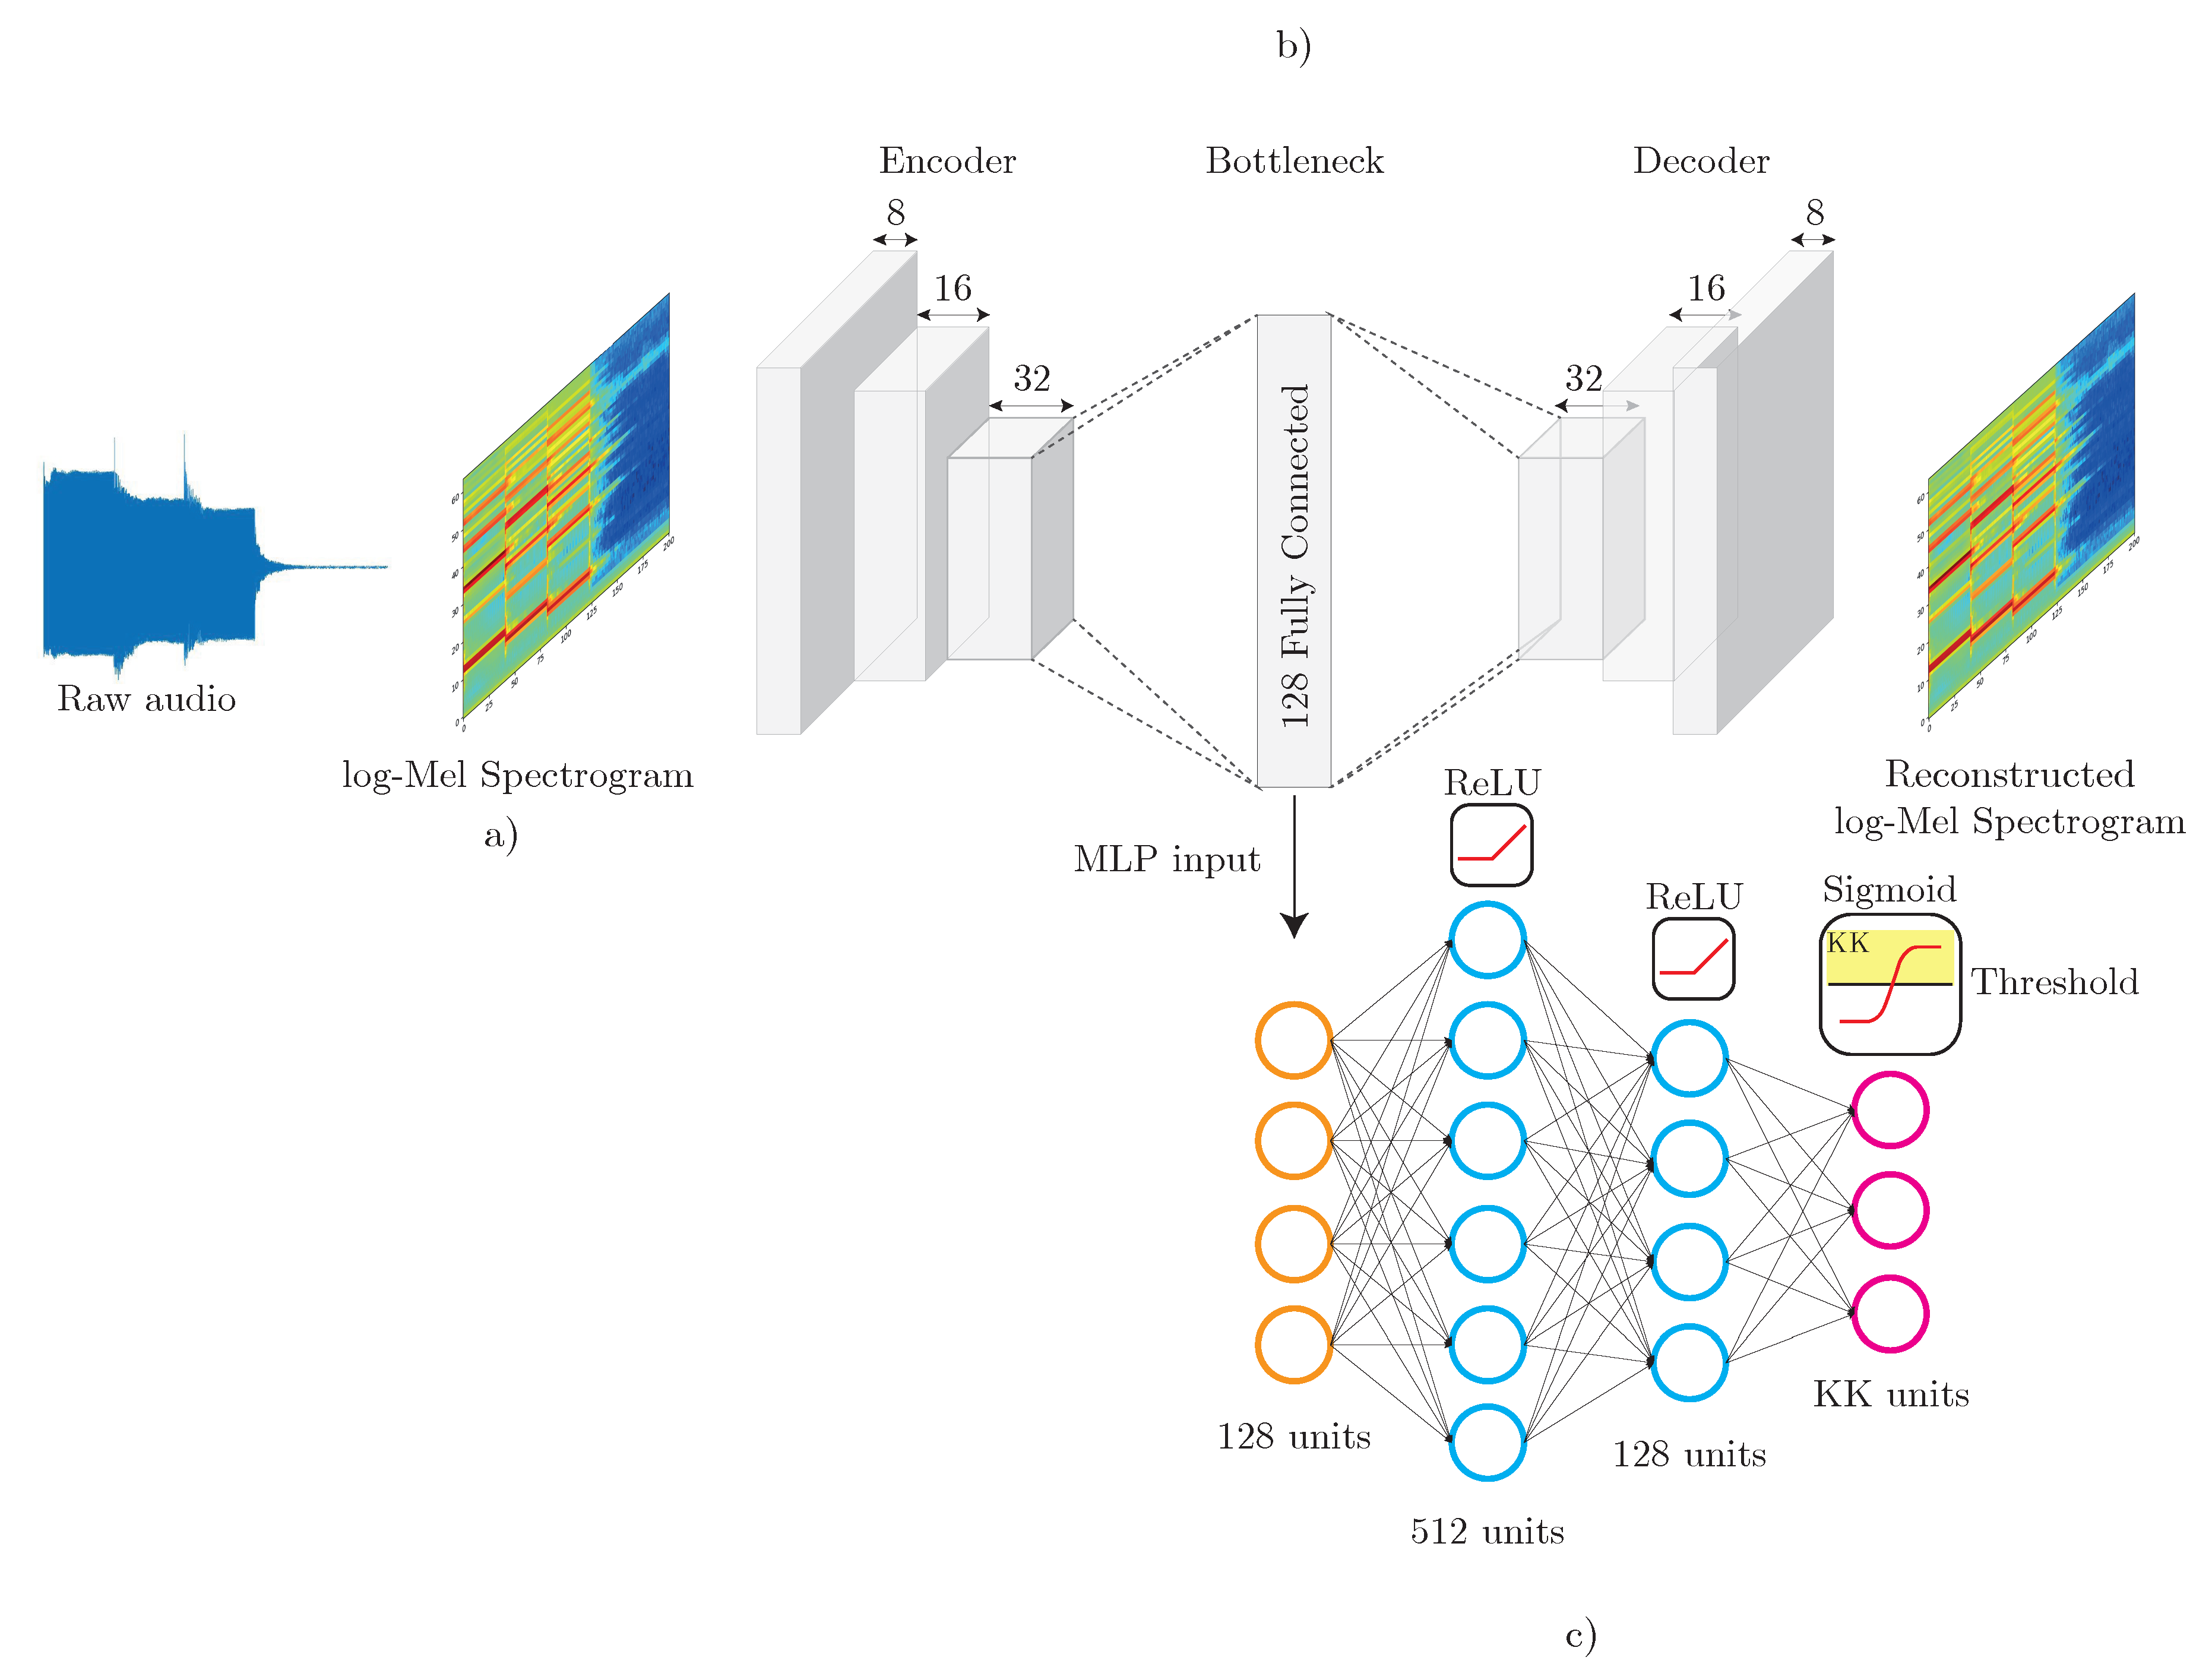

In [5]:
display(Image(filename='Audio Conv2D.png'))

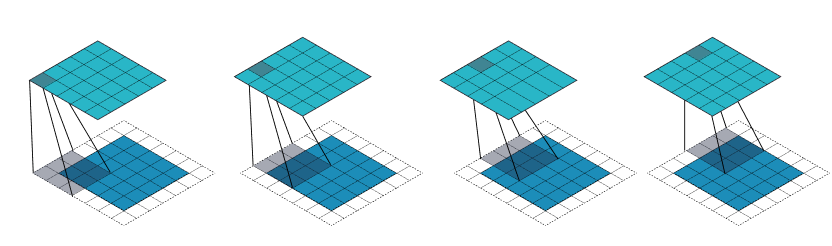

In [6]:
display(Image(filename='Conv2D.png'))

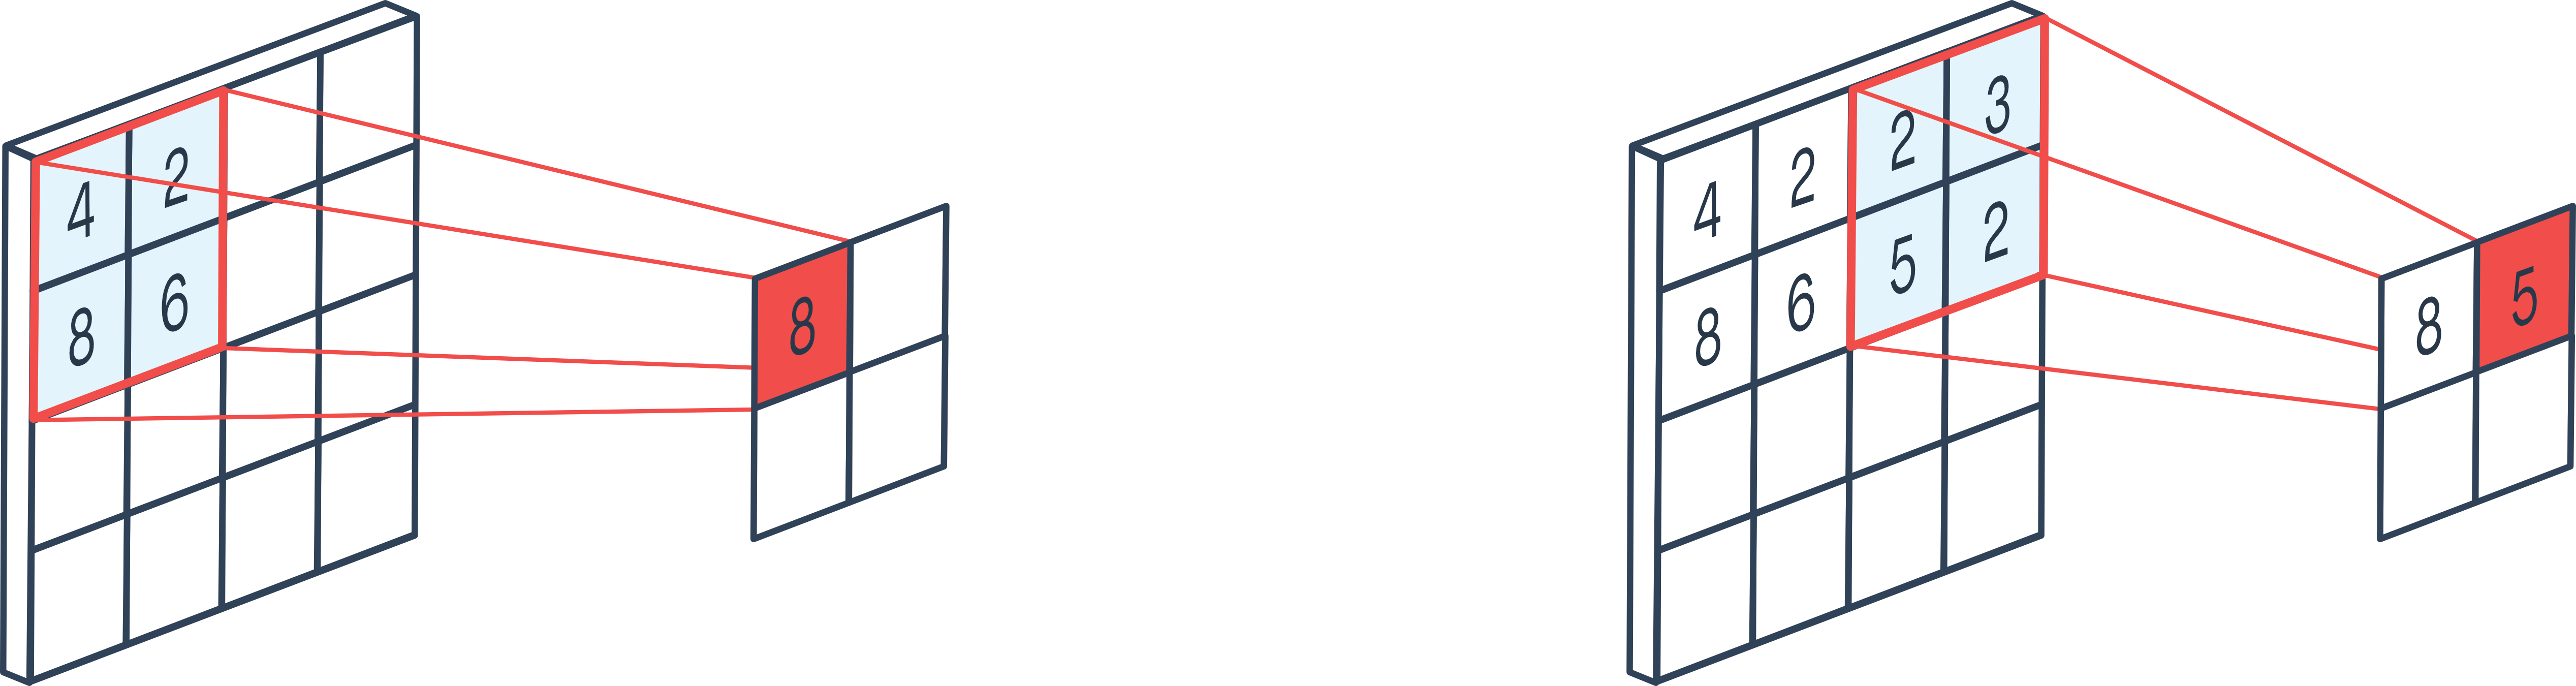

In [7]:
display(Image(filename='Max Pooling.png'))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten,InputLayer
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD, Adam
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint

In [ ]:
def basemodel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(60,41,2), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='softmax'))
    # Compile model
    epochs = 25
    lrate = 0.01
    decay = lrate/epochs
#     sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay, amsgrad=False)
    model.compile(loss='categorical_crossentropy', optimizer = adam, metrics=['accuracy'])
    return model

In [ ]:
# https://machinelearningmastery.com/check-point-deep-learning-models-keras/
if not os.path.exists('model'):
    os.makedirs('model')

filepath = "model/saved-model-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

In [ ]:
model = basemodel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 41, 32)        608       
                                                                 
 dropout (Dropout)           (None, 60, 41, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 41, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 20, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 30, 20, 64)        0         
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
              height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
              horizontal_flip=True,  # randomly flip images
              vertical_flip=False  # randomly flip images
          )

In [ ]:
# init the batch size and epochs

'''
Note: Due to Memory Error like Buffered data was truncated after reaching the output size limit. What i did is that Save the model in for example 60th epoch and close current program and run new program and restore saved model and train model from 61 epoch to 120 epoch and 
save that and close program and repeat this work for your interested epoch For this [100,50] three times repeat 

'''
batch_size = 50
epochs = 100

In [ ]:
# fit the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(X_test, y_test),
                              verbose=1,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (27998, 60, 41, 2) (2 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
560/560 [==============================] - 46s 65ms/step - loss: 3.6510 - accuracy: 0.0553 - val_loss: 3.4362 - val_accuracy: 0.0922
Epoch 2/100
560/560 [==============================] - 33s 59ms/step - loss: 3.0173 - accuracy: 0.1646 - val_loss: 2.8915 - val_accuracy: 0.2014
Epoch 3/100
560/560 [==============================] - 35s 63ms/step - loss: 2.5995 - accuracy: 0.2540 - val_loss: 2.4374 - val_accuracy: 0.3020
Epoch 4/100
560/560 [==============================] - 33s 59ms/step - loss: 2.3507 - accuracy: 0.3199 - val_loss: 2.2807 - val_accuracy: 0.3382
Epoch 5/100
560/560 [==============================] - 33s 59ms/step - loss: 2.1766 - accuracy: 0.3641 - val_loss: 2.1690 - val_accuracy: 0.3748
Epoch 6/100
560/560 [==============================] - 36s 64ms/step - loss: 2.0467 - accuracy: 0.3977 - val_loss: 2.0576 - val_accuracy: 0.4024
Epoch 7/100
560/560 [==============================] - 33s 59ms/step - loss: 1.9346 - accuracy: 0.4270 - val_loss: 1.9638 - val_ac

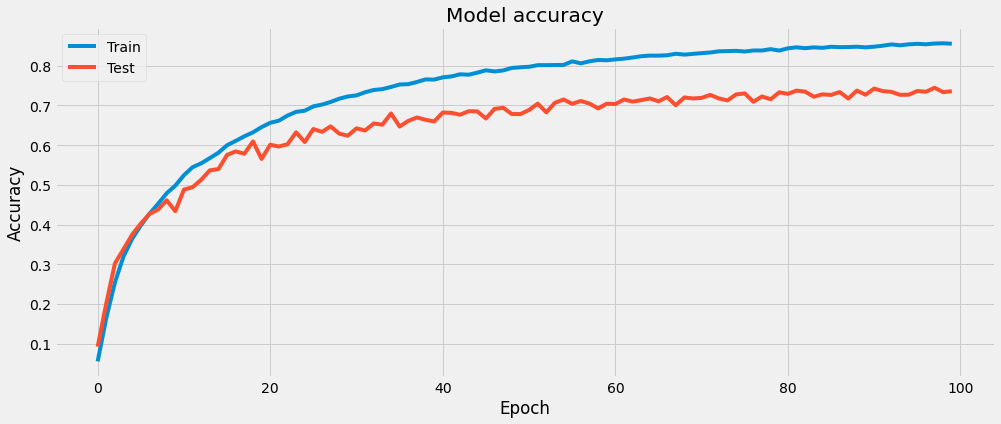

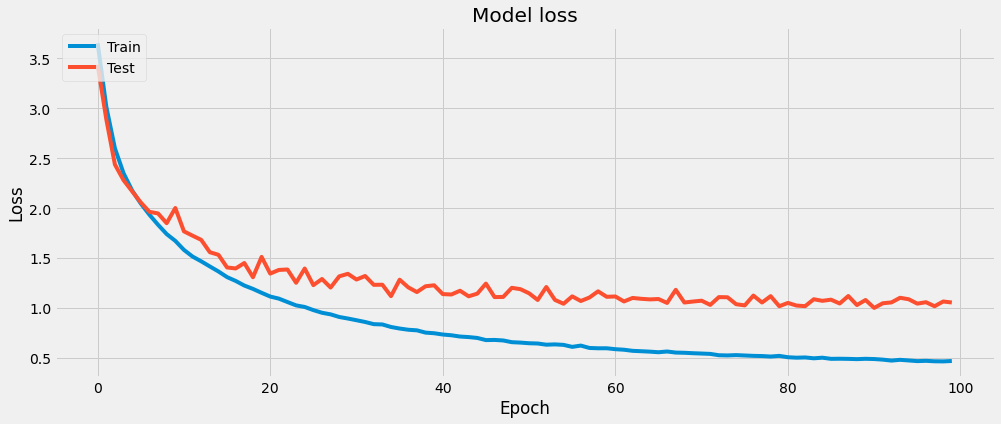

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Plot training & validation accuracy values
plt.figure(figsize=(15,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# evaluate model
model.evaluate(X_test, y_test)

376/376 [==============================] - 4s 11ms/step - loss: 1.0562 - accuracy: 0.7360


[1.0561637878417969, 0.7359606623649597]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predict_x=model.predict(X_test) 
y_pred =np.argmax(predict_x,axis=1)

In [ ]:
target_name = np.array(df['category'])

In [ ]:
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_name))

                  precision    recall  f1-score   support

             dog       0.76      0.78      0.77       244
         rooster       0.71      0.43      0.53       238
             pig       0.77      0.76      0.76       253
             cow       0.73      0.68      0.71       225
            frog       0.89      0.88      0.89       245
             cat       0.67      0.62      0.65       233
             hen       0.83      0.62      0.71       237
         insects       0.85      0.69      0.76       244
           sheep       0.77      0.78      0.78       235
            crow       0.77      0.81      0.79       221
            rain       0.85      0.98      0.91       229
       sea_waves       0.83      0.90      0.87       243
  crackling_fire       0.92      0.81      0.86       245
        crickets       0.93      0.84      0.89       242
  chirping_birds       0.84      0.74      0.78       244
     water_drops       0.70      0.55      0.62       229
            w

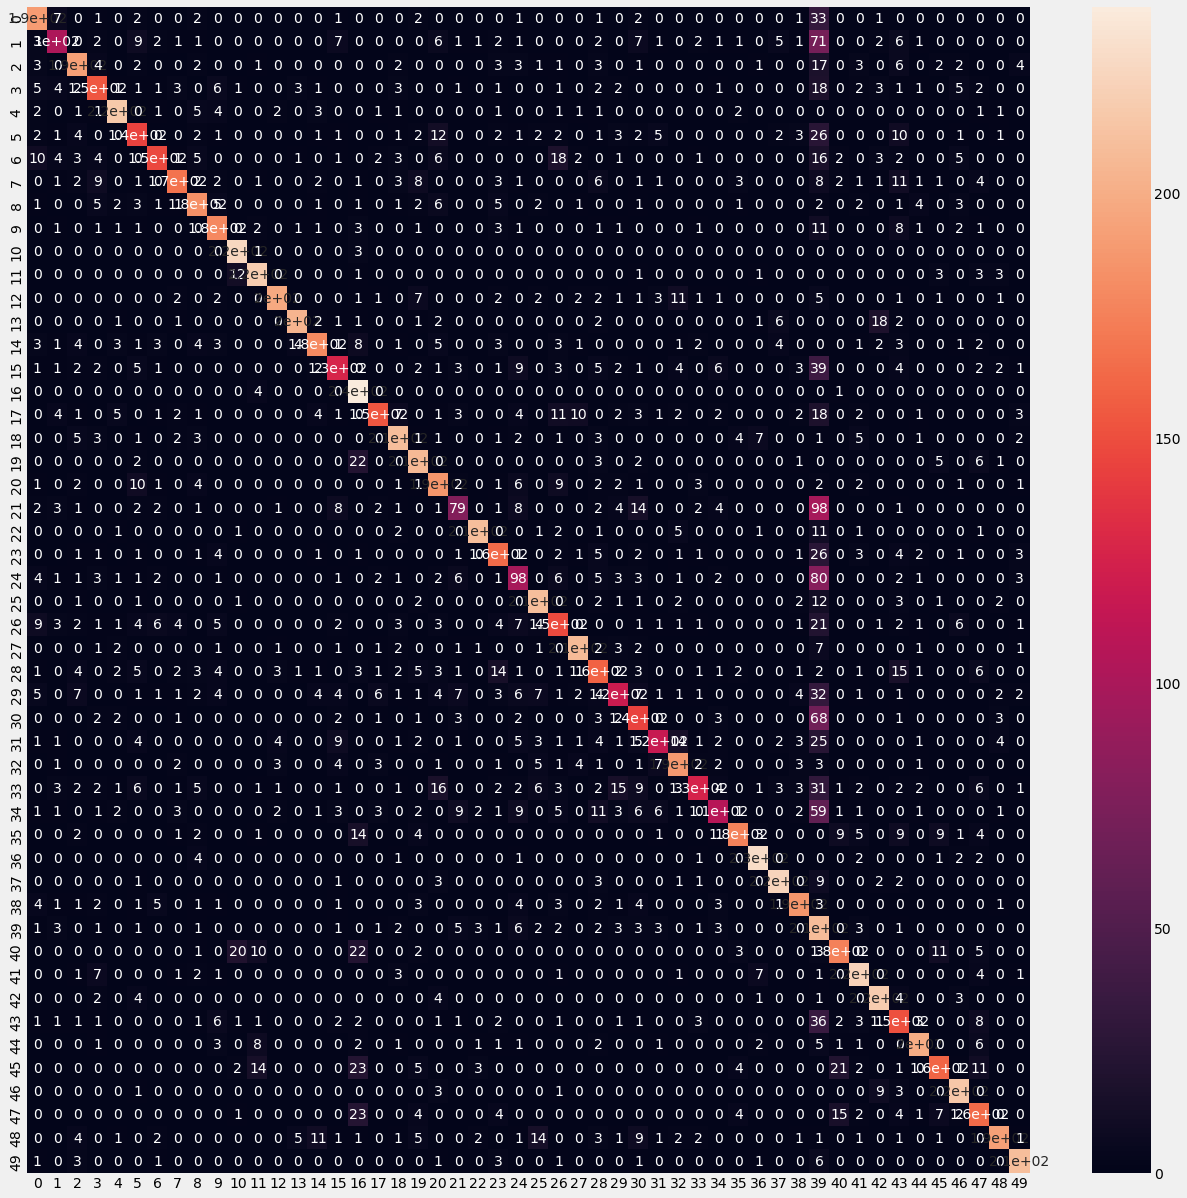

In [ ]:
import seaborn as sns
cn_matrix = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
plt.figure(figsize = (20,20))
sns.heatmap(cn_matrix, annot=True)

In [ ]:
# model.save("audio_save_model")

INFO:tensorflow:Assets written to: audio_save_model/assets


In [ ]:
# It can be used to reconstruct the model identically.
from tensorflow import keras
reconstructed_model = keras.models.load_model("audio_save_model")

In [ ]:
predict_x=reconstructed_model.predict(X_test) 
y_pred =np.argmax(predict_x,axis=1)
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_name))

                  precision    recall  f1-score   support

             dog       0.76      0.78      0.77       244
         rooster       0.71      0.43      0.53       238
             pig       0.77      0.76      0.76       253
             cow       0.73      0.68      0.71       225
            frog       0.89      0.88      0.89       245
             cat       0.67      0.62      0.65       233
             hen       0.83      0.62      0.71       237
         insects       0.85      0.69      0.76       244
           sheep       0.77      0.78      0.78       235
            crow       0.77      0.81      0.79       221
            rain       0.85      0.98      0.91       229
       sea_waves       0.83      0.90      0.87       243
  crackling_fire       0.92      0.81      0.86       245
        crickets       0.93      0.84      0.89       242
  chirping_birds       0.84      0.74      0.78       244
     water_drops       0.70      0.55      0.62       229
            w